### Logistic Regression with ROC curve and ROC AUC score

In [12]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [13]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
## Lets create basic logistic regression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
## Prediction based on probability
model_prob = model.predict_proba(X_test)

In [18]:
## Lets focus on positive output
model_prob = model_prob[:,1]

In [19]:
## Lets calculate the score
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [20]:
## calculate ROC curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr , model_tpr, thresholds = roc_curve(y_test, model_prob)

In [21]:
model_tpr, model_fpr

(array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
        0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
        0.37288136, 0.37288136, 0.43220339, 0.43220339, 0.55084746,
        0.55084746, 0.60169492, 0.60169492, 0.6440678 , 0.6440678 ,
        0.6779661 , 0.6779661 , 0.68644068, 0.68644068, 0.69491525,
        0.69491525, 0.70338983, 0.70338983, 0.74576271, 0.74576271,
        0.79661017, 0.79661017, 0.81355932, 0.81355932, 0.83050847,
        0.83050847, 0.84745763, 0.84745763, 0.86440678, 0.86440678,
        0.88135593, 0.88135593, 0.88983051, 0.88983051, 0.89830508,
        0.89830508, 0.92372881, 0.92372881, 0.93220339, 0.93220339,
        0.94067797, 0.94067797, 0.95762712, 0.95762712, 0.96610169,
        0.96610169, 0.97457627, 0.97457627, 0.98305085, 0.98305085,
        1.        , 1.        ]),
 array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
        0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
        0.0303

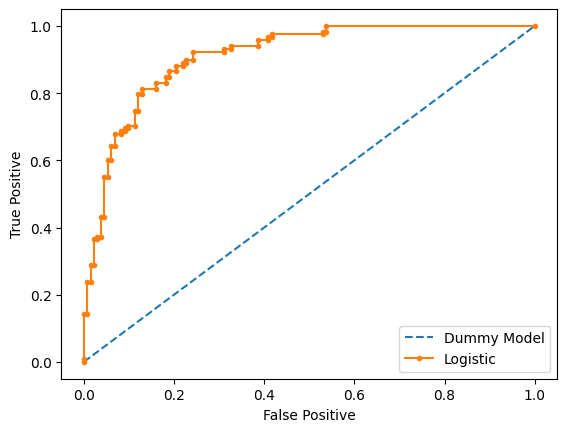

In [22]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

/var/folders/nr/nkj6zchs6k1dwg2lzbbsyvq80000gn/T/ipykernel_44161/4145494253.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


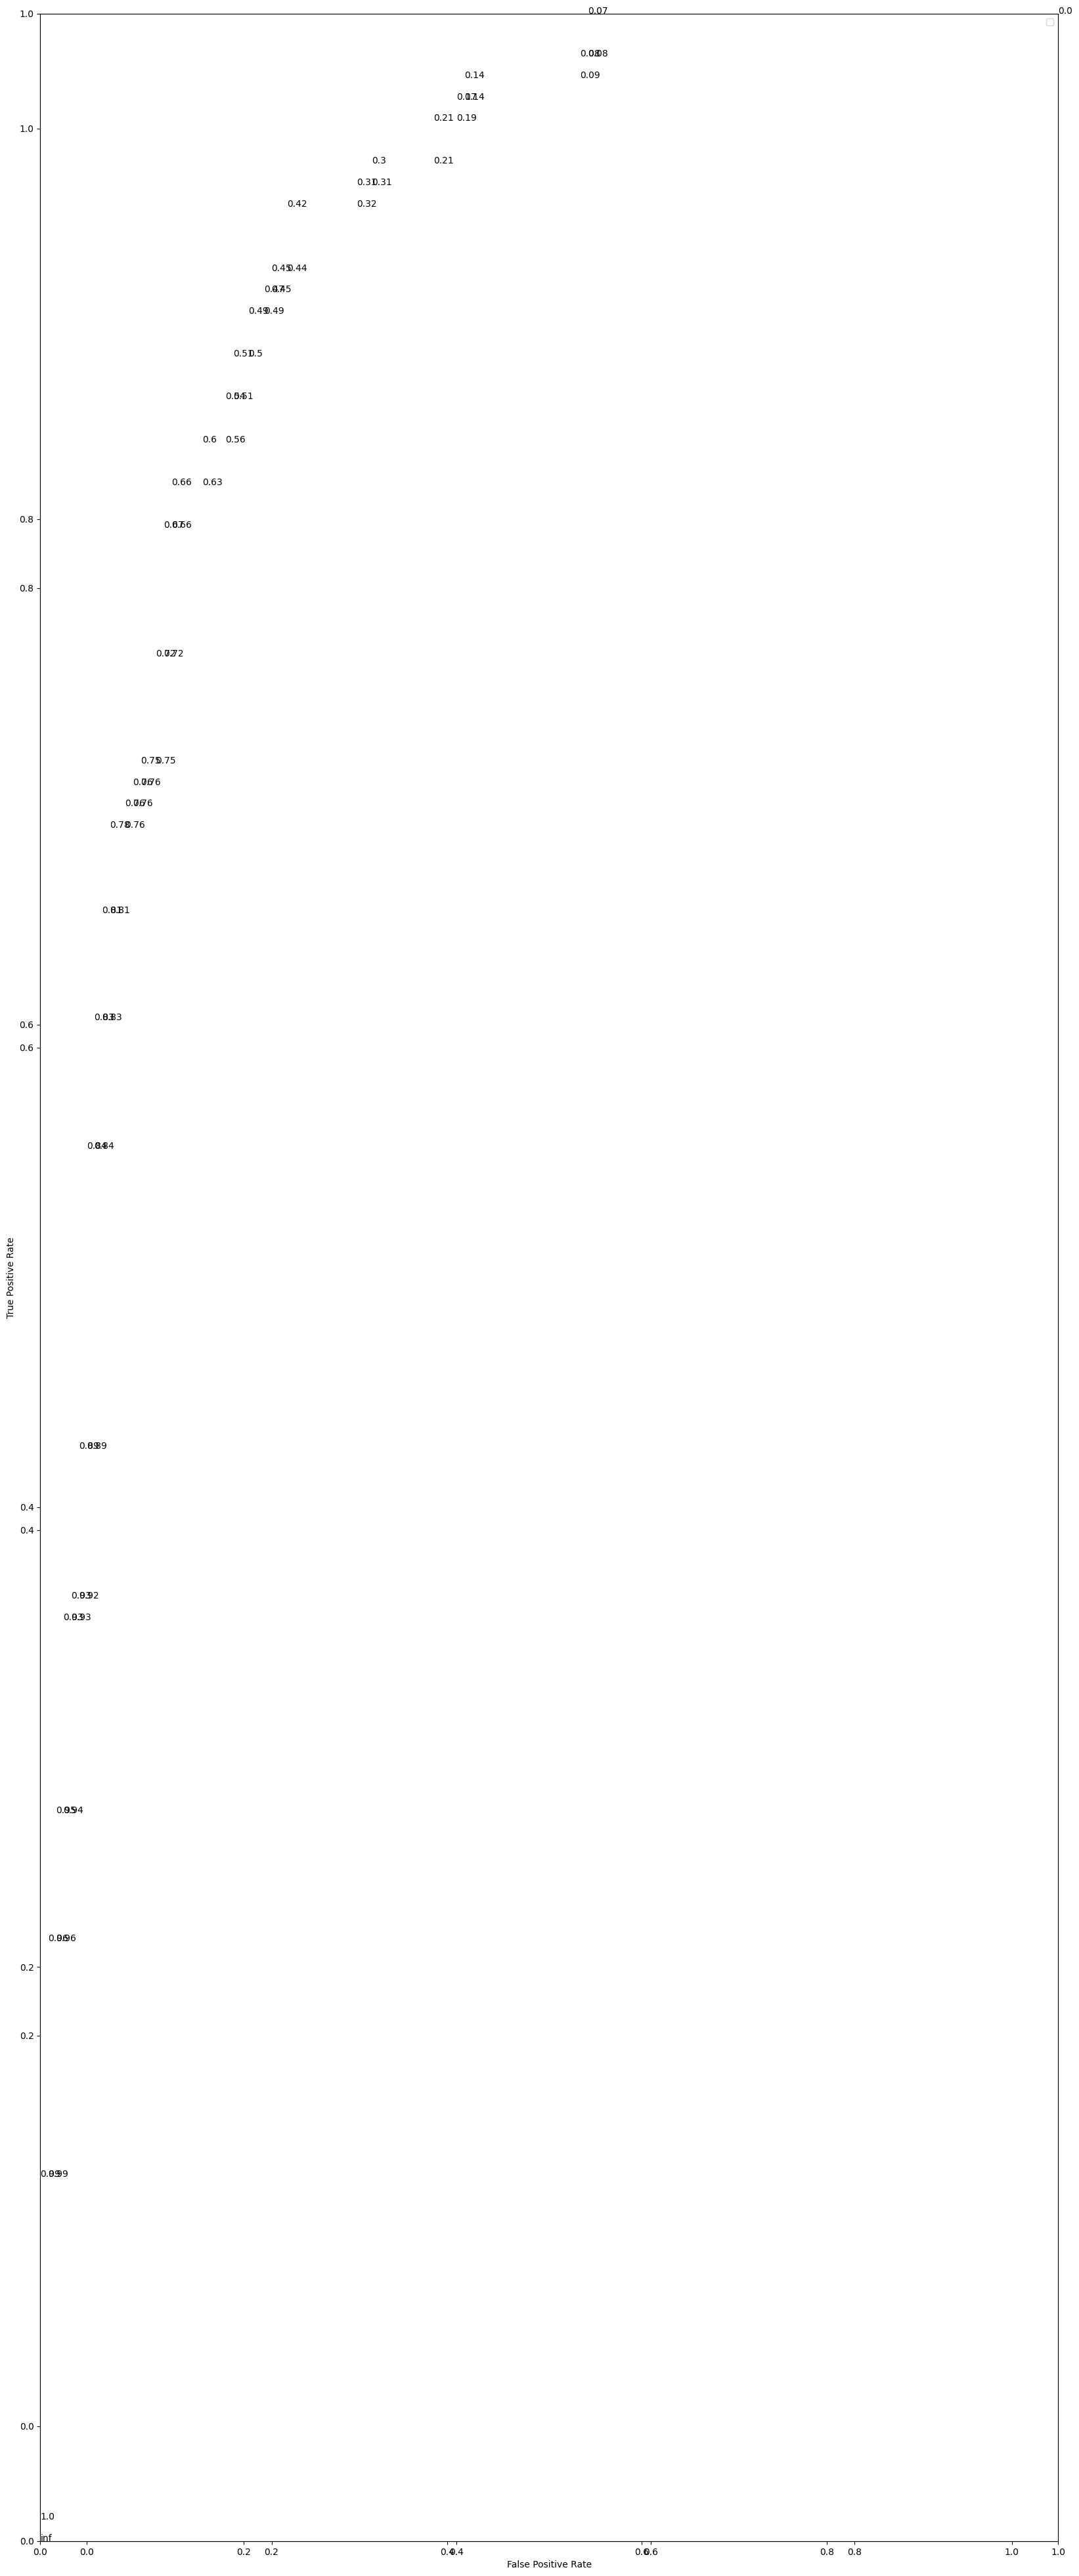

In [23]:
# plot the roc curve for the model
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()